In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os, shutil
from keras import models
from keras import layers
from sklearn.metrics import confusion_matrix, f1_score
np.random.seed(123)
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [2]:
directory = 'Alzheimer_s Dataset/'

In [3]:
test_directory = 'Alzheimer_s Dataset/test/'
train_directory = 'Alzheimer_s Dataset/train/'

In [4]:
data_genorator = ImageDataGenerator(rescale=1./255,validation_split=0.2)

In [5]:
data_train= data_genorator.flow_from_directory( 
        train_directory, 
        subset= 'training',
        target_size=(224, 224), 
        batch_size = 4098, 
        seed = 123)

Found 4098 images belonging to 4 classes.


In [6]:
data_valid = data_genorator.flow_from_directory( 
        train_directory, 
        subset= 'validation',
        target_size=(224, 224), 
        batch_size = 1023, 
        seed = 123)

Found 1023 images belonging to 4 classes.


In [7]:
data_test= ImageDataGenerator(rescale=1./255).flow_from_directory( 
        test_directory, 
        subset= 'training',
        target_size=(224, 224), 
        batch_size = 1279, 
        seed = 123)

Found 1279 images belonging to 4 classes.


In [18]:
train_images, train_labels = next(data_train)

test_images, test_labels = next(data_test)

valid_images, valid_labels = next(data_valid)

In [19]:
def get_label(array):
    if array[0] ==1:
        return 0
    elif array[1] ==1:
        return 1
    elif array[2] ==1:
        return 2
    elif array[3] ==1:
        return 3

In [20]:
train_label_names = np.apply_along_axis(get_label,1,train_labels)

test_label_names = np.apply_along_axis(get_label,1,test_labels)

valid_label_names = np.apply_along_axis(get_label,1,valid_labels)

In [21]:
train_labels[:9]

array([[0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]], dtype=float32)

In [52]:
from pickle import load

In [58]:
train_images_aug, train_labels_aug = load(open('train_aug.pickle','rb'))

In [26]:
x_train = train_images.reshape(4098,150528)

x_test = test_images.reshape(1279,150528)

x_valid = valid_images.reshape(1023,150528)

In [38]:
from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.optimizers import Adam, SGD
from keras.metrics import Recall, Precision 
from keras.callbacks import EarlyStopping

## Basic Convoluted Neural Network

In [1]:
batch_size = 50
num_classes = 4
epochs = 30
np.random.seed(7)


y_train = keras.utils.to_categorical(train_labels, num_classes)

y_valid = keras.utils.to_categorical(valid_labels, num_classes)


cnn = models.Sequential()
cnn.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(224, 224,  3),use_bias=True))
cnn.add(layers.MaxPooling2D((2, 2)))
cnn.add(layers.Conv2D(32, (3, 3), activation='relu',use_bias=True))
cnn.add(layers.MaxPooling2D((2, 2)))
cnn.add(layers.Flatten())
cnn.add(layers.Dropout(0.5))
cnn.add(layers.Dense(32, activation='relu'))
cnn.add(layers.Dense(4, activation='softmax'))

cnn.summary()

cnn.compile(loss='categorical_crossentropy',
              optimizer= Adam(),
              metrics=[Recall(),'accuracy'])

early_stop = EarlyStopping(monitor='val_loss',patience=10,verbose=1,mode='auto')

#dont forget to change
history = cnn.fit(train_images, train_labels,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    callbacks = [early_stop],
                    validation_data=(valid_images, valid_labels))
score = cnn.evaluate(test_images, test_labels, verbose=0)
print('test loss:', score[0])
print('Test recall:', score[1])
print('Test Accuracy', score[2])

NameError: name 'np' is not defined

In [69]:
batch_size = 50
num_classes = 4
epochs = 30
np.random.seed(7)


y_train = keras.utils.to_categorical(train_labels, num_classes)

y_valid = keras.utils.to_categorical(valid_labels, num_classes)


cnn = models.Sequential()
cnn.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(224, 224,  3),use_bias=True))
cnn.add(layers.MaxPooling2D((2, 2)))
cnn.add(layers.Conv2D(32, (3, 3), activation='relu',use_bias=True))
cnn.add(layers.MaxPooling2D((2, 2)))
cnn.add(layers.Flatten())
cnn.add(layers.Dense(32, activation='relu'))
cnn.add(layers.Dense(4, activation='softmax'))

cnn.summary()

cnn.compile(loss='categorical_crossentropy',
              optimizer= Adam(),
              metrics=[Recall(),'accuracy'])

early_stop = EarlyStopping(monitor='val_loss',patience=5,verbose=1,mode='auto')

#dont forget to change
history = cnn.fit(train_images, train_labels,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    callbacks = [early_stop],
                    validation_data=(valid_images, valid_labels))
score = cnn.evaluate(test_images, test_labels, verbose=0)
print('test loss:', score[0])
print('Test recall:', score[1])
print('Test Accuracy', score[2])

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_52 (Conv2D)           (None, 222, 222, 64)      1792      
_________________________________________________________________
max_pooling2d_44 (MaxPooling (None, 111, 111, 64)      0         
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 109, 109, 32)      18464     
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, 54, 54, 32)        0         
_________________________________________________________________
flatten_20 (Flatten)         (None, 93312)             0         
_________________________________________________________________
dense_53 (Dense)             (None, 32)                2986016   
_________________________________________________________________
dense_54 (Dense)             (None, 4)               

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

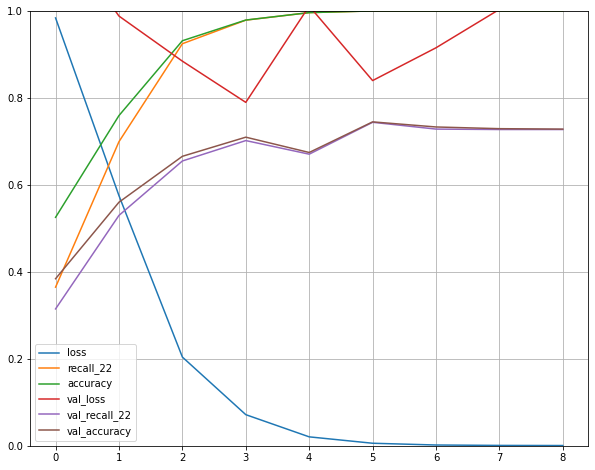

In [75]:
history_df = pd.DataFrame(history.history)
history_df.plot(figsize=(10,8))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [77]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [81]:
y_pred = cnn.predict_classes(test_images)

In [82]:
y_pred

array([2, 2, 3, ..., 2, 0, 2])

Confusion Matrix, without normalization
[[ 75  11  73  20]
 [  1   7   4   0]
 [113  36 429  62]
 [ 59  47 174 168]]


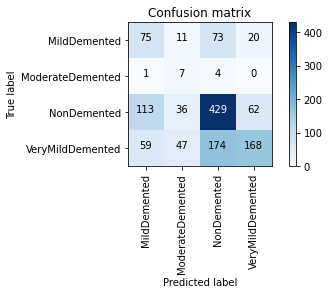

In [83]:
import itertools
confusion = confusion_matrix(test_labels.argmax(axis=1),y_pred)
plot_confusion_matrix(confusion,data_test.class_indices)

conv2d_52 (3, 3, 3, 64)
64


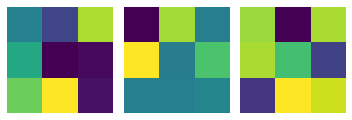

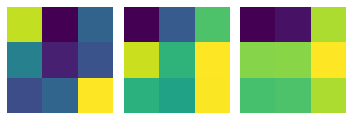

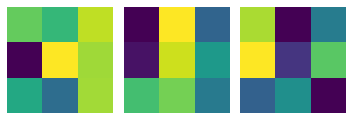

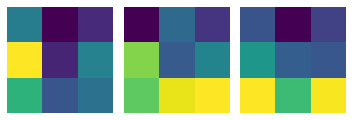

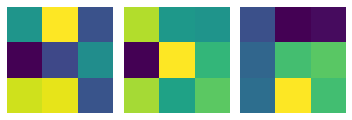

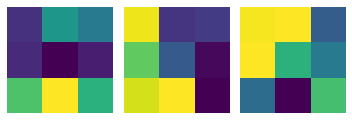

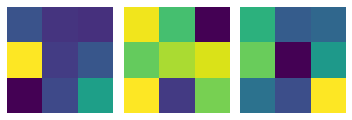

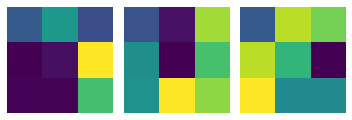

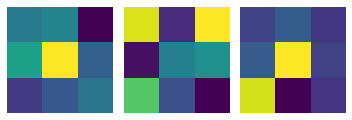

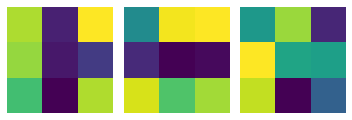

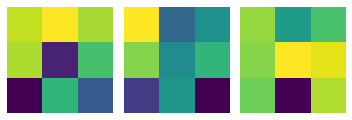

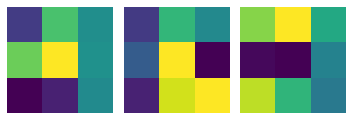

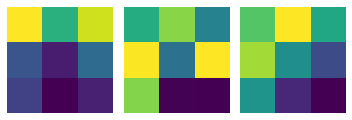

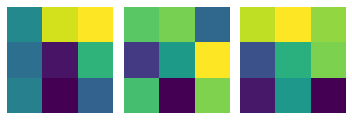

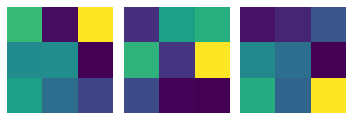

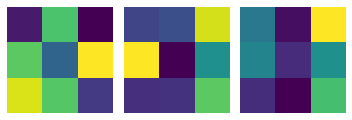

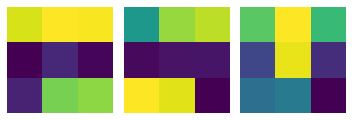

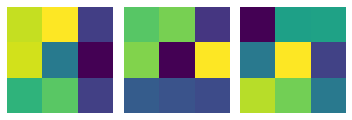

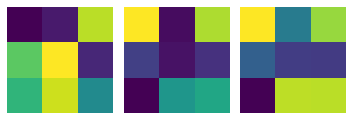

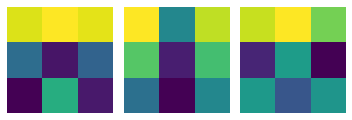

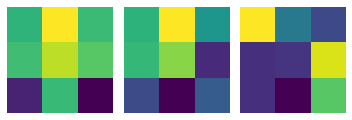

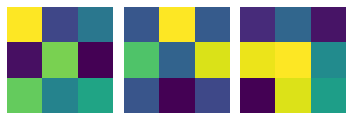

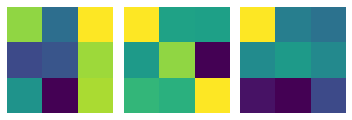

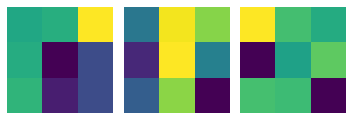

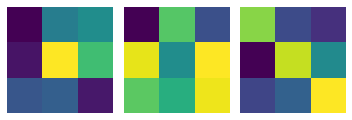

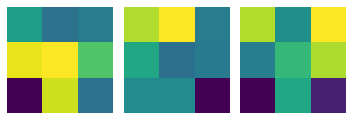

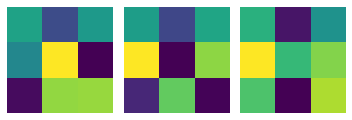

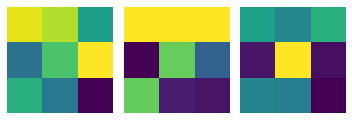

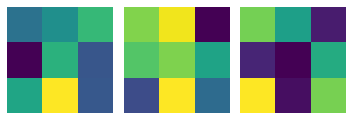

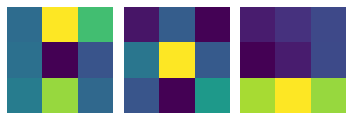

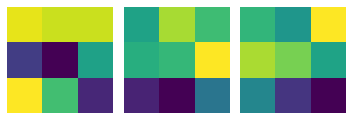

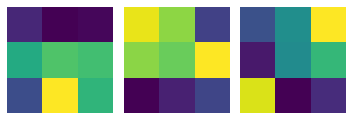

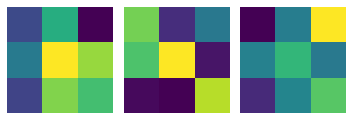

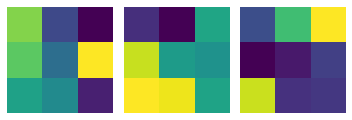

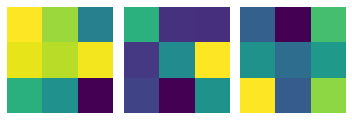

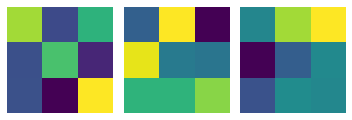

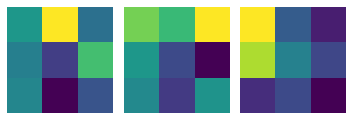

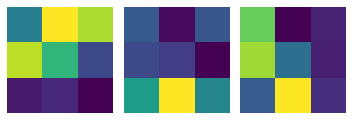

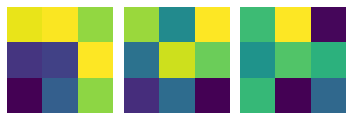

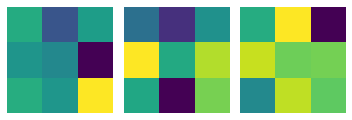

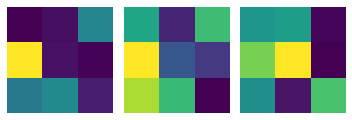

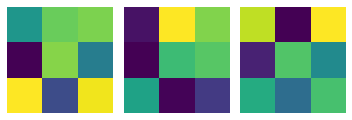

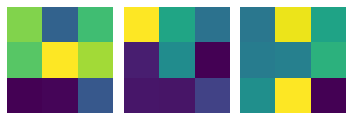

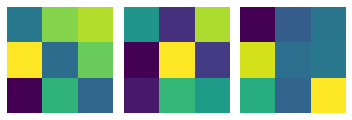

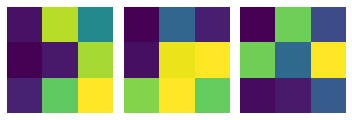

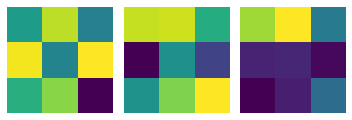

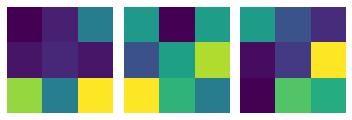

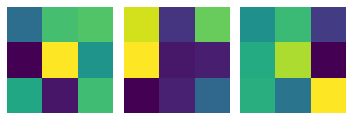

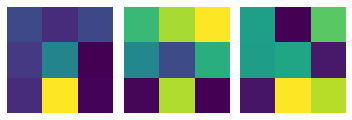

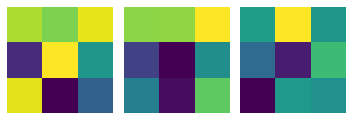

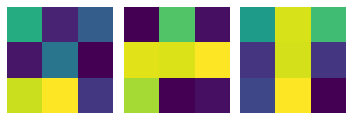

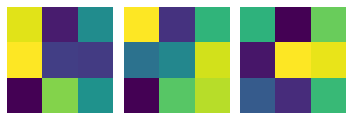

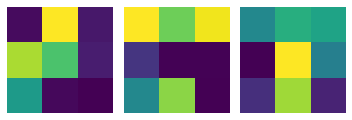

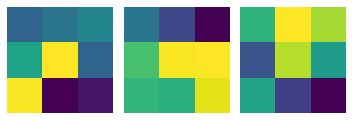

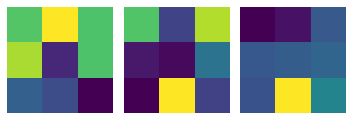

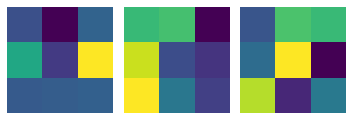

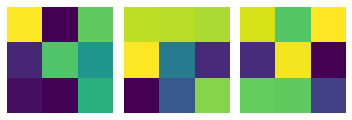

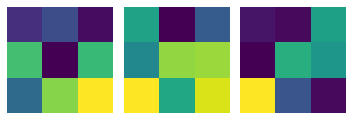

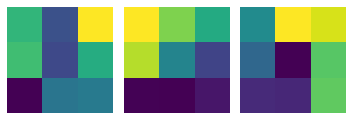

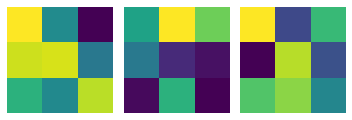

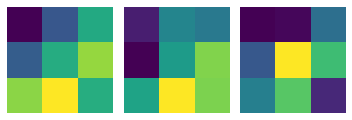

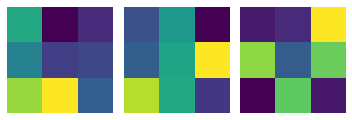

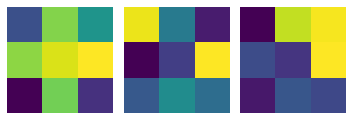

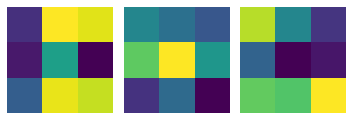

conv2d_53 (3, 3, 64, 32)
32


In [87]:
def plotFilters(conv_filter):
    fig, axes = plt.subplots(1, 3, figsize=(5,5))
    axes = axes.flatten()
    for img, ax in zip( conv_filter, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
    
for layer in cnn.layers:
    if 'conv' in layer.name:
        filters, bias= layer.get_weights()
        print(layer.name, filters.shape)
         #normalize filter values between  0 and 1 for visualization
        f_min, f_max = filters.min(), filters.max()
        filters = (filters - f_min) / (f_max - f_min)  
        print(filters.shape[3])
        axis_x=1
        #plotting all the filters
        for i in range(filters.shape[3]):
        #for i in range(6):
            #get the filters
            filt=filters[:,:,:, i]
            plotFilters(filt)

In [92]:
filters.shape[3]

32

sequential_23 (3, 3, 64, 32)
64


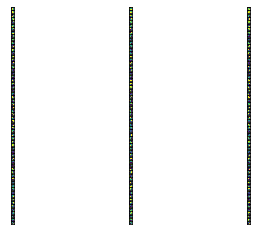

sequential_23 (3, 3, 3, 64)
32


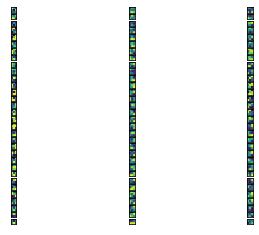

In [94]:
#Iterate thru all the layers of the model
for layer in cnn.layers:
    if 'conv' in layer.name:
        weights, bias= layer.get_weights()
        print(cnn.name, filters.shape)
        
        #normalize filter values between  0 and 1 for visualization
        f_min, f_max = weights.min(), weights.max()
        filters = (weights - f_min) / (f_max - f_min)  
        print(filters.shape[3])
        filter_cnt=1
        
        #plotting all the filters
        for i in range(filters.shape[3]):
            #get the filters
            filt=filters[:,:,:, i]
            #plotting each of the channel, color image RGB channels
            for j in range(filters.shape[0]):
                ax= plt.subplot(filters.shape[3], filters.shape[0], filter_cnt  )
                ax.set_xticks([])
                ax.set_yticks([])
                plt.imshow(filt[:,:, j])
                filter_cnt+=1
        plt.show()

In [103]:

a= load_img('./Alzheimer_s Dataset/test/ModerateDemented/27.jpg',target_size=(224,224))
a_array = np.array([img_to_array(a)])

cnn.predict_classes(a_array)

array([1])

In [105]:
import tensorflow as tf

(1, 111, 111, 64)
(1, 109, 109, 32)
(1, 54, 54, 32)
(1, 93312)
(1, 32)
(1, 4)


/Users/mitchellkrieger/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:53: RuntimeWarning: invalid value encountered in true_divide


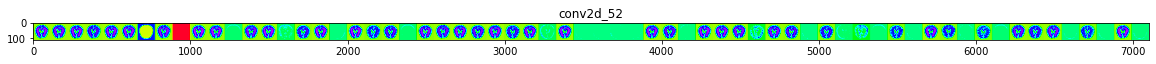

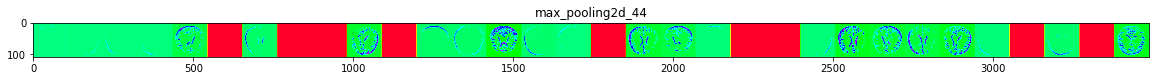

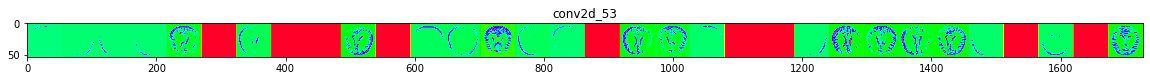

In [117]:
img_path='./Alzheimer_s Dataset/test/ModerateDemented/27.jpg' 
# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in cnn.layers[1:]]

#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = cnn.input, outputs = successive_outputs)

img = load_img(img_path, target_size=(224, 224))  # this is a PIL image

x   = img_to_array(img)                           # Numpy array with shape (224, 224, 3)
x   = x.reshape((1,) + x.shape)                   # Numpy array with shape (1, 224, 224, 3)

# Rescale by 1/255
x /= 255.0

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in cnn.layers]

# -----------------------------------------------------------------------
# Now let's display our representations
# -----------------------------------------------------------------------
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  print(feature_map.shape)
  if len(feature_map.shape) == 4:
    
    #-------------------------------------------
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    #-------------------------------------------
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    #-------------------------------------------------
    # Postprocess the feature to be visually palatable
    #-------------------------------------------------
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid

    #-----------------
    # Display the grid
    #-----------------

    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='gist_rainbow' )

## Basic CNN with Augmented

In [60]:
print(train_images_aug.shape)
print(train_labels_aug.shape)

(6000, 224, 224, 3)
(6000, 4)


In [71]:
batch_size = 50
num_classes = 4
epochs = 30
np.random.seed(73)


y_train = keras.utils.to_categorical(train_labels, num_classes)

y_valid = keras.utils.to_categorical(valid_labels, num_classes)


cnn_aug = models.Sequential()
cnn_aug.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(224, 224,  3),use_bias=True))
cnn_aug.add(layers.MaxPooling2D((2, 2)))
cnn_aug.add(layers.Conv2D(32, (3, 3), activation='relu',use_bias=True))
cnn_aug.add(layers.MaxPooling2D((2, 2)))
cnn_aug.add(layers.Flatten())
cnn_aug.add(layers.Dense(32, activation='relu'))
cnn_aug.add(layers.Dense(4, activation='softmax'))

cnn_aug.summary()

cnn_aug.compile(loss='categorical_crossentropy',
              optimizer= Adam(),
              metrics=[Recall(),'accuracy'])

early_stop = EarlyStopping(monitor='val_loss',patience=10,verbose=1,mode='auto')

#dont forget to change
cnn_aug_history = cnn.fit(train_images_aug, train_labels_aug,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    callbacks = [early_stop],
                    validation_data=(valid_images, valid_labels))
score = cnn_aug.evaluate(test_images, test_labels, verbose=0)
print('test loss:', score[0])
print('Test recall:', score[1])
print('Test Accuracy', score[2])

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_54 (Conv2D)           (None, 222, 222, 64)      1792      
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 111, 111, 64)      0         
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 109, 109, 32)      18464     
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 54, 54, 32)        0         
_________________________________________________________________
flatten_21 (Flatten)         (None, 93312)             0         
_________________________________________________________________
dense_55 (Dense)             (None, 32)                2986016   
_________________________________________________________________
dense_56 (Dense)             (None, 4)               

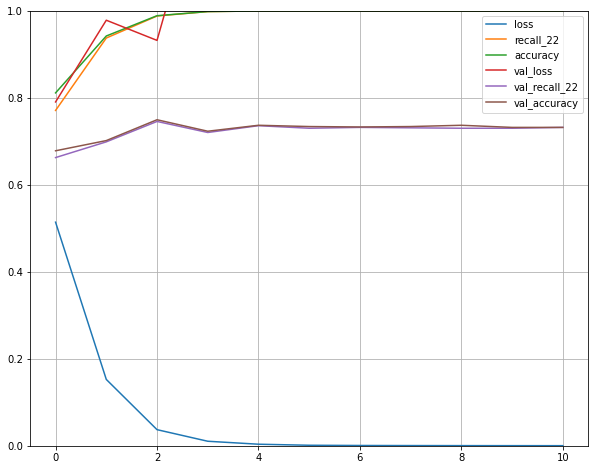

In [76]:
cnn_aug_history_df = pd.DataFrame(cnn_aug_history.history)
cnn_aug_history_df.plot(figsize=(10,8))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

Confusion Matrix, without normalization
[[  0 179   0   0]
 [  0  12   0   0]
 [  0 640   0   0]
 [  0 448   0   0]]


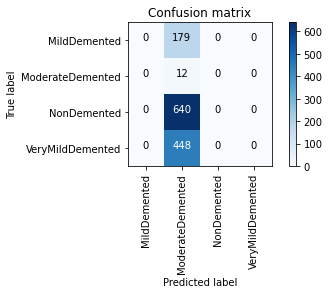

In [84]:
y_pred = cnn_aug.predict_classes(test_images)
confusion = confusion_matrix(test_labels.argmax(axis=1),y_pred)
plot_confusion_matrix(confusion,data_test.class_indices)

## AlexNet Model

In [49]:
batch_size = 24
num_classes = 4
epochs = 30

alex = keras.models.Sequential([
    keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(224,224,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=384, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4, activation='softmax')
])

alex.summary()

alex.compile(loss='categorical_crossentropy',
              optimizer= Adam(),
              metrics=[Recall(),'accuracy'])

early_stop = EarlyStopping(monitor='val_loss',patience=5,verbose=1,mode='auto')

alex_history = alex.fit(train_images, train_labels,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    callbacks = [early_stop],
                    validation_data=(valid_images, valid_labels))

score = alex.evaluate(test_images, test_labels, verbose=0)

print('test loss:', score[0])
print('Test recall:', score[1])
print('Test Accuracy', score[2])

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 54, 54, 96)        34944     
_________________________________________________________________
batch_normalization_15 (Batc (None, 54, 54, 96)        384       
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 26, 26, 96)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 26, 26, 256)       614656    
_________________________________________________________________
batch_normalization_16 (Batc (None, 26, 26, 256)       1024      
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 12, 12, 256)       0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 12, 12, 384)     

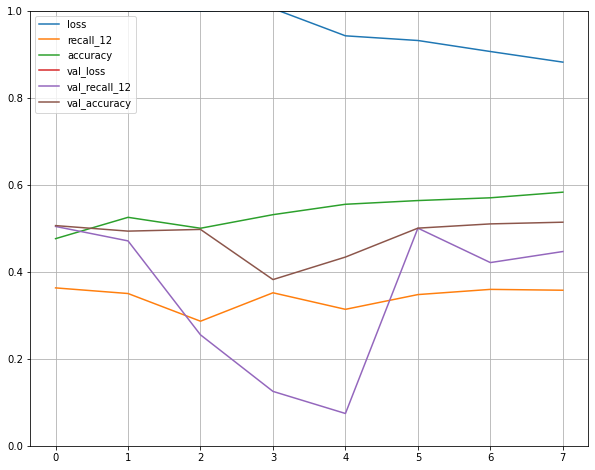

In [50]:
history_df = pd.DataFrame(alex_history.history)
history_df.plot(figsize=(10,8))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

Confusion Matrix, without normalization
[[  0   0 132  47]
 [  0   0  12   0]
 [  0   0 623  17]
 [  0   0 383  65]]


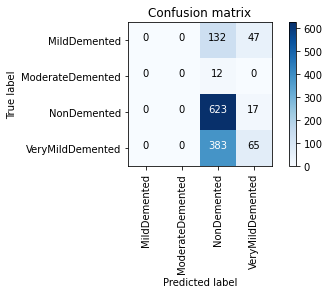

In [85]:
y_pred = alex.predict_classes(test_images)
confusion = confusion_matrix(test_labels.argmax(axis=1),y_pred)
plot_confusion_matrix(confusion,data_test.class_indices)

## InceptionNet

In [118]:
from keras.applications import inception_v3
from keras.layers import Dense,GlobalAveragePooling2D
from sklearn.metrics import confusion_matrix, f1_score
from keras.models import Model

In [128]:
imagenet=inception_v3.InceptionV3(weights='imagenet',include_top=False)
imagenet_new=imagenet.output
new_model = models.Sequential()
new_model.add(imagenet)
new_model.add(GlobalAveragePooling2D())
new_model.add(Dense(1024,activation='relu'))
new_model.add(Dense(1024,activation='relu')) #dense layer 2
new_model.add(Dense(512,activation='relu')) #dense layer 3
new_model.add(Dense(4,activation='softmax')) #final layer with softmax activation

In [ ]:
new_model.compile(optimizer='Adam',
                  loss='binary_crossentropy',
                  metrics=[Recall(),'accuracy'])

new_model.summary()

# step_size_train=train_generator.n//train_generator.batch_size
new_model.fit(train_images,
          train_labels,
          epochs=10,
          batch_size=50,
          validation_data=(valid_images, valid_labels))

score = new_model.evaluate(test_images, test_labels, verbose=0)

print('test loss:', score[0])
print('Test recall:', score[1])
print('Test Accuracy', score[2])

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, None, None, 2048)  21802784  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 2048)              0         
_________________________________________________________________
dense_61 (Dense)             (None, 1024)              2098176   
_________________________________________________________________
dense_62 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_63 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_64 (Dense)             (None, 4)                 2052      
Total params: 25,477,412
Trainable params: 25,442,980
Non-trainable params: 34,432
____________________________________

In [126]:
train_label_names.shape

(4098,)